# **"Heart Disease Prediction Using Decision Tree Classifier"**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the csv file**

In [2]:
df1=pd.read_csv("heart.csv")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Checking for the null Values**

In [3]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Checking for the duplicated values**

In [4]:
df1.duplicated().sum()

1

## **Droping the duplicated values**

In [5]:
df1.drop_duplicates(inplace=True)

In [6]:
df1.duplicated().sum()

0

In [3]:
df1.to_csv("heart_disease_cleaned.csv",index=False)

## **Checking the unique values present in the target column**

In [7]:
df1['target'].unique()

array([1, 0], dtype=int64)

In [8]:
df1['target'].nunique()

2

## **Value counts of the target column**

In [9]:
df1['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

## **Summary of the dataframe**

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
cols=list(df1.columns)

In [12]:
cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## **Checking for the outliers by using box plot**

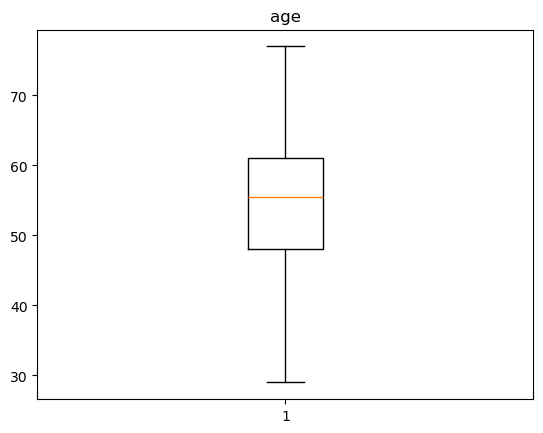

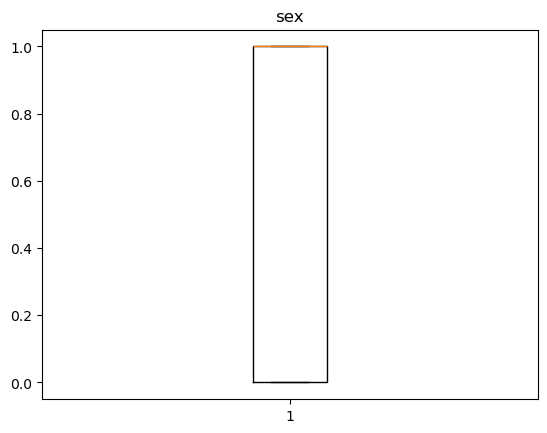

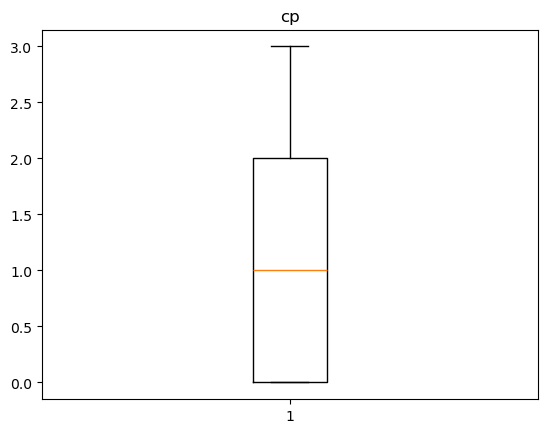

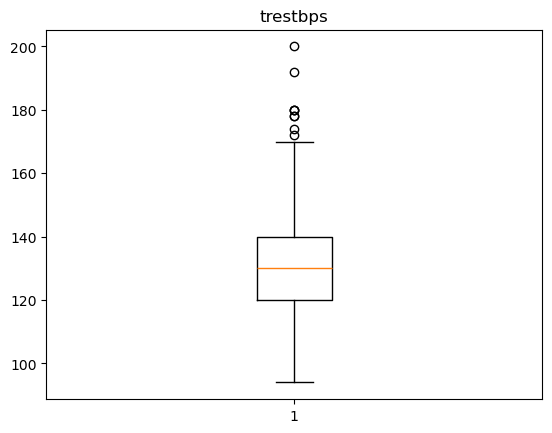

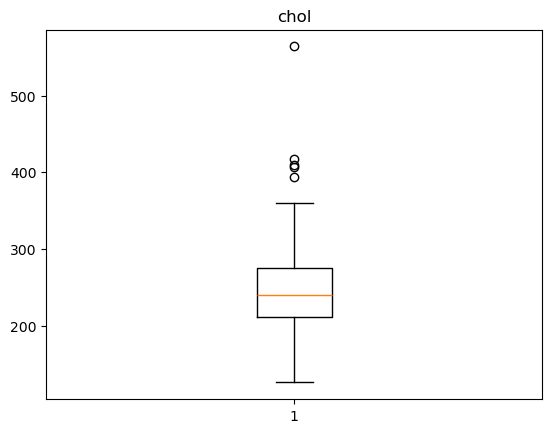

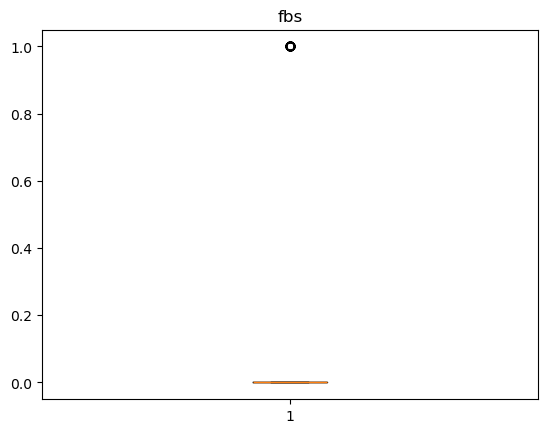

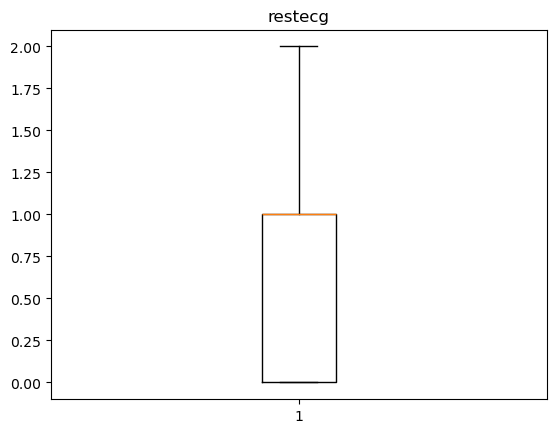

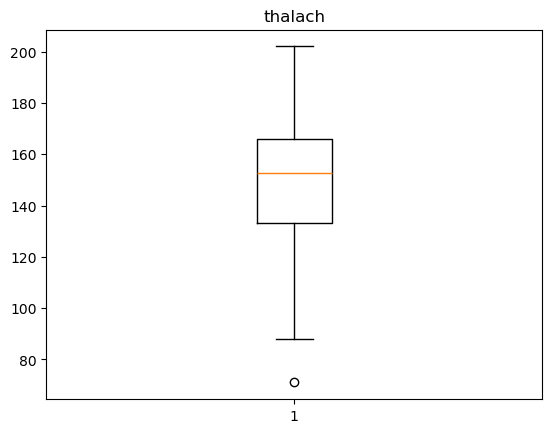

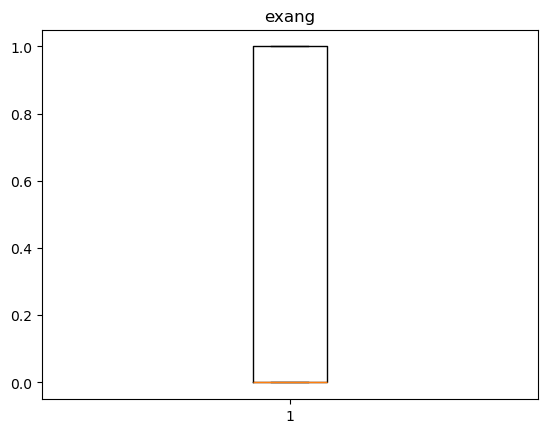

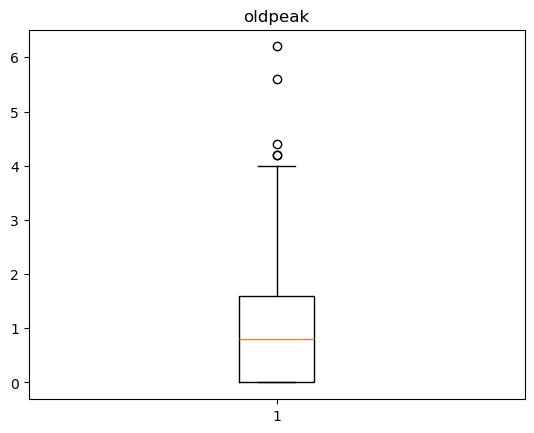

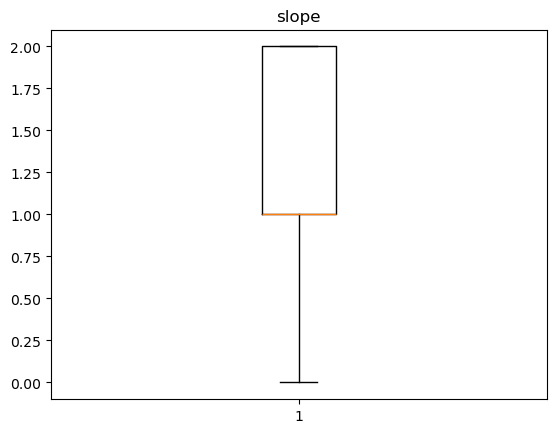

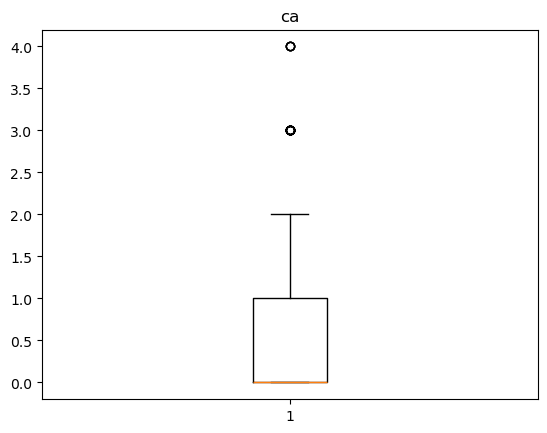

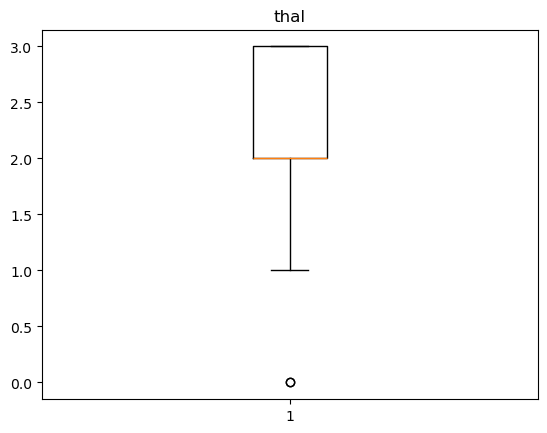

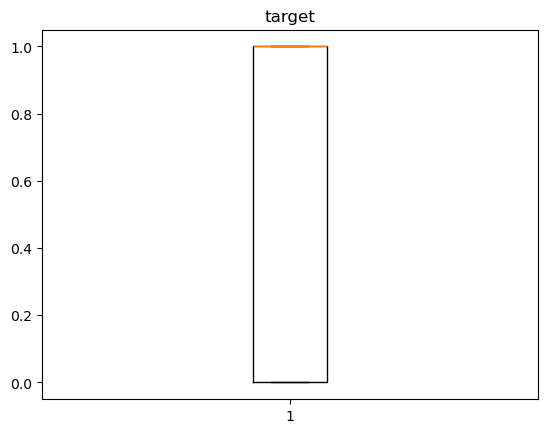

In [13]:
import matplotlib.pyplot as plt

for i in df1.columns:
    if df1[i].dtype in ['int64', 'float64']:
        plt.boxplot(df1[i])
        plt.title(i)
        plt.show()


## **Ploting the dataframe in the heatmap**

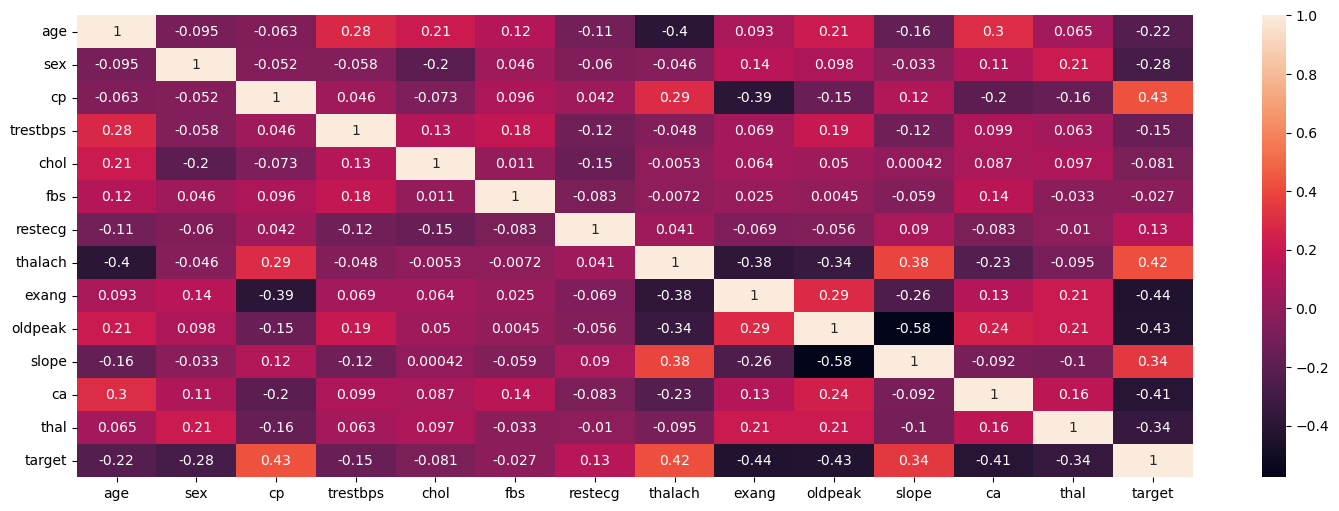

In [14]:
plt.figure(figsize=(18,6))
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

## **Importing the necessary libraries from the sklearn**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


## **Splitting the data into X_train,X_test, Y_train and Y_test**

In [55]:
X=df1.drop(columns=['target'],axis=1)
Y=df1['target']

In [56]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [57]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [60]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [61]:
Y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [62]:
Y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

## **Using the DecisionTree algorithm**

In [63]:
model=DecisionTreeClassifier()

In [64]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

## **Using the trained model to predict the target values**

In [65]:
Y_predict=model.predict(X_test)

In [66]:
Y_predict

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## **Calculating the accuracy of the model's predictions by comparing them to the actual target values**

In [67]:
accuracy_score(Y_predict,Y_test)*100

80.32786885245902

## **Creating a confusion matrix that compares the predicted labels (Y_predict) with the actual labels (Y_test)**

In [68]:
confusion_matrix(Y_predict,Y_test)

array([[25,  8],
       [ 4, 24]], dtype=int64)

## **The following code predicts the target outcome for a single input using the trained model and prints the result.**

In [74]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_df = pd.DataFrame([[19,1,1,130,300,0,1,130,0,0.2,1,0,2]], columns=columns)

input_model = model.predict(input_df)
print(input_model)

[1]
